# Imersão de Dados 04 - Pesquisa de Imóveis em São Paulo

# Aula 04

# Tabela de Conteúdos
1. Definição do Problema
2. Definição da Baseline
3. Planejamento da Solução
4. Coleta e Limpeza dos Dados
5. Análise Exploratória dos Dados

# 1) Definição do Problema

### 1.1) Problema de Negócio
Nós possuimos duas bases de dados não tratados, uma primária que se trata de dados referentes a imóveis da cidade de São Paulo, e um segundo dataset que consta de dados básicos retirados do IBGE relacionados ao último CENSU realizado em 2010. Nosso objetibo com estes dados é realizar uma análise completa e extrair insights interessantes relacionando o primeiro dataset sobre imóveis, com os dados provindos do segundo dataset, que dentre outras coisas, nos trás informações sobre imóveis em diversos estados e o valor do rendimento mensal da família responsável pelo respectivo imóvel.

>#### DESAFIOS:
>- Realizar uma análise dos dados do IBGE por mapa, analisando a distribuição de renda.
>- Repassar a aula para entender melhor o que foi realizado.
>- Aprofundar a análise entre dados de vendas e renda.
>- Realizar a análise exploratória e encontrar variáveis relevantes para solução do problema.

# 2) Planejamento da Solução
### 2.1) Produto Final
Notebook contendo uma análise exploratória de dados que vincule os dados do dataset de imóveis em São Paulo com os dados do dataset IBGE, e realize sobre ele um tratamento contra outliers, valores duplicados e faça a tranfosmação apropriada nas colunas. Além disso, ter gerado análises com os dados agrupados por mais de uma categoria e ter todo o notebook no formato de projeto.
- Arquivos com estrutura de projeto
- Análises em um notebook, arquivo com extensão .ipynb
### 2.2) Tech Stack
- Python, Pandas e Numpy
- Matplotlib e Seaborn
- Jupyter Notebook e VSCode
### 2.3) Processo:
- Realizar uma análise dos dados do IBGE por mapa, analisando a distribuição de renda.
- Repassar a aula para entender melhor o que foi realizado.
- Aprofundar a análise entre dados de vendas e renda.
- Realizar a análise exploratória e encontrar variáveis relevantes para solução do problema.

# Coleta e Limpeza dos Dados

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy import stats

sns.set()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 500)
plt.rcParams['figure.figsize'] = (20, 10)

In [35]:
dados_vendas_censo = pd.read_csv( '../assets/dados_vendas_censo.csv' )
dados_vendas_censo.dropna( how='all', axis=1, inplace=True )
dados_vendas_censo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,7.00,7000.00,Avenida Itacira,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00,355030877000067.00,3.00,Regiï¿½o Sudeste,35.00,Sï¿½o Paulo,3515.00,Metropolitana de Sï¿½o Paulo,35061.00,Sï¿½o Paulo,20.00,RM Sï¿½o Paulo,3550308.00,Sï¿½O PAULO,355030877.00,SAï¿½DE,35503087700.00,SAï¿½DE,3550308000.00,Sï¿½O PAULO (todos os setores),1.00,0.00,164.00,437.00,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,3.70,7459.68,Rua Aurelia Perez Alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00,355030871000023.00,3.00,Regiï¿½o Sudeste,35.00,Sï¿½o Paulo,3515.00,Metropolitana de Sï¿½o Paulo,35061.00,Sï¿½o Paulo,20.00,RM Sï¿½o Paulo,3550308.00,Sï¿½O PAULO,355030871.00,SANTO AMARO,35503087100.00,SANTO AMARO,3550308000.00,Sï¿½O PAULO (todos os setores),1.00,0.00,136.00,425.00,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,0.38,3040.00,Rua Alba Valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00,355030830000050.00,3.00,Regiï¿½o Sudeste,35.00,Sï¿½o Paulo,3515.00,Metropolitana de Sï¿½o Paulo,35061.00,Sï¿½o Paulo,20.00,RM Sï¿½o Paulo,3550308.00,Sï¿½O PAULO,355030830.00,GRAJAï¿½,35503083000.00,GRAJAï¿½,3550308000.00,Sï¿½O PAULO (todos os setores),1.00,0.00,142.00,493.00,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,0.54,5400.00,Rua Tobias Barreto,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00,355030808000050.00,3.00,Regiï¿½o Sudeste,35.00,Sï¿½o Paulo,3515.00,Metropolitana de Sï¿½o Paulo,35061.00,Sï¿½o Paulo,20.00,RM Sï¿½o Paulo,3550308.00,Sï¿½O PAULO,355030808.00,BELï¿½M,35503080800.00,BELï¿½M,3550308000.00,Sï¿½O PAULO (todos os setores),1.00,0.00,156.00,468.00,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,1.98,4500.00,Rua Graham Bell,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00,355030865000169.00,3.00,Regiï¿½o Sudeste,35.00,Sï¿½o Paulo,3515.00,Metropolitana de Sï¿½o Paulo,35061.00,Sï¿½o Paulo,20.00,RM Sï¿½o Paulo,3550308.00,Sï¿½O PAULO,355030865.00,RAPOSO TAVARES,35503086500.00,RAPOSO TAVARES,3550308000.00,Sï¿½O PAULO (todos os setores),1.00,0.00,107.00,376.00,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46


### Limpando os dados

Por questão de tempo, vou utilizar apenas o método do John Tukey de detecção de outliers que considera como outliers, dados que estejam cerca de 3 vezees o valor do IQR para cima ou para baixo.

In [36]:
# Checando por valores nulos
soma_nulos = dados_vendas_censo.isna().sum()
soma_nulos[soma_nulos > 0]

Bairro                     8
setor_censo              285
Cod_setor                289
Cod_Grandes Regiï¿½es    289
Nome_Grande_Regiao       289
Cod_UF                   289
Nome_da_UF               289
Cod_meso                 289
Nome_da_meso             289
Cod_micro                289
Nome_da_micro            289
Cod_RM                   289
Nome_da_RM               289
Cod_municipio            289
Nome_do_municipio        289
Cod_distrito             289
Nome_do_distrito         289
Cod_subdistrito          289
Nome_do_subdistrito      289
Cod_bairro               289
Nome_do_bairro           289
Situacao_setor           289
Tipo_setor               289
V001                     289
V002                     289
V003                     289
V004                     289
V005                     289
V006                     289
V007                     289
V008                     289
V009                     289
V010                     289
V011                     289
V012          

In [37]:
dados_vendas_censo.dropna( subset='setor_censo', axis='rows', inplace=True )

In [38]:
dados_vendas_censo.isna().sum()

Rua                      0
Bairro                   8
Cidade                   0
Metragem                 0
Quartos                  0
Banheiros                0
Vagas                    0
Valor                    0
Valor_anuncio            0
Valor_mm                 0
Valor_m2                 0
rua                      0
cep                      0
latitude                 0
longitude                0
Point                    0
setor_censo              0
Cod_setor                4
Cod_Grandes Regiï¿½es    4
Nome_Grande_Regiao       4
Cod_UF                   4
Nome_da_UF               4
Cod_meso                 4
Nome_da_meso             4
Cod_micro                4
Nome_da_micro            4
Cod_RM                   4
Nome_da_RM               4
Cod_municipio            4
Nome_do_municipio        4
Cod_distrito             4
Nome_do_distrito         4
Cod_subdistrito          4
Nome_do_subdistrito      4
Cod_bairro               4
Nome_do_bairro           4
Situacao_setor           4
T

In [39]:
# Checando por duplicatas
dados_vendas_censo.duplicated().sum()

0

In [40]:
dados_vendas_censo.shape

(5320, 50)

## [DESAFIO 1] Realizar uma análise dos dados do IBGE por mapa, analisando a distribuição de renda

In [42]:
setor_censo = gpd.read_file("../assets/35SEE250GC_SIR.shp")
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.00,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.00,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


<AxesSubplot:>

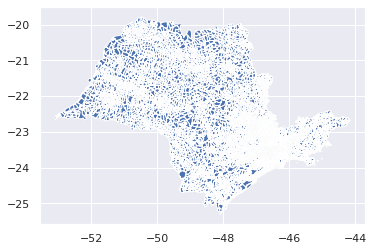

In [ ]:
setor_censo.plot()

In [ ]:
import plotly.express as px

In [ ]:
dados_vendas_censo = dados_vendas_censo.rename( {'V009': 'Renda_mensal_familia'}, axis=1 )

In [ ]:
fig = px.scatter_mapbox(
    dados_vendas_censo,
    lat='latitude',
    lon='longitude',
    color='Renda_mensal_familia',
    size='Valor_m2',
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=10,
)

fig.update_layout( mapbox_style='open-street-map' )
fig.update_layout( height=600, margin={'r':0,'t':0,'l':0,'b':0,} )
fig.show()

## [DESAFIO 2] Repassar a aula para entender melhor o que foi realizado.

In [ ]:
print( 'Feito!!!' )

Feito!!!


## [DESAFIO 3] Aprofundar a análise entre dados de vendas e renda.

###### VENDAS
| Código da variável | Descrição |
| --- | --- |
Metragem | Área em metros quadrado
Quartos | Número de quartos no imóvel
Banheiros | Número de banheiros no imóvel
Vagas |  Vagas de estacionamento por veículo
Valor_anuncio | Preço da casa que está em moeda brasileira BRL

###### RENDA
| Código da variável | Descrição |
| --- | --- |
V001                | Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes
V002                | Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes
V003                | Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de Var2 por Var1)
V004                | Variância do número de moradores em domicílios particulares permanentes
V005                | Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)
V006                | Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)
V007                | Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)
V008                | Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)
V009                | Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
V010                | Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
V011                | Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com rendimento)
V012                | Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com rendimento)

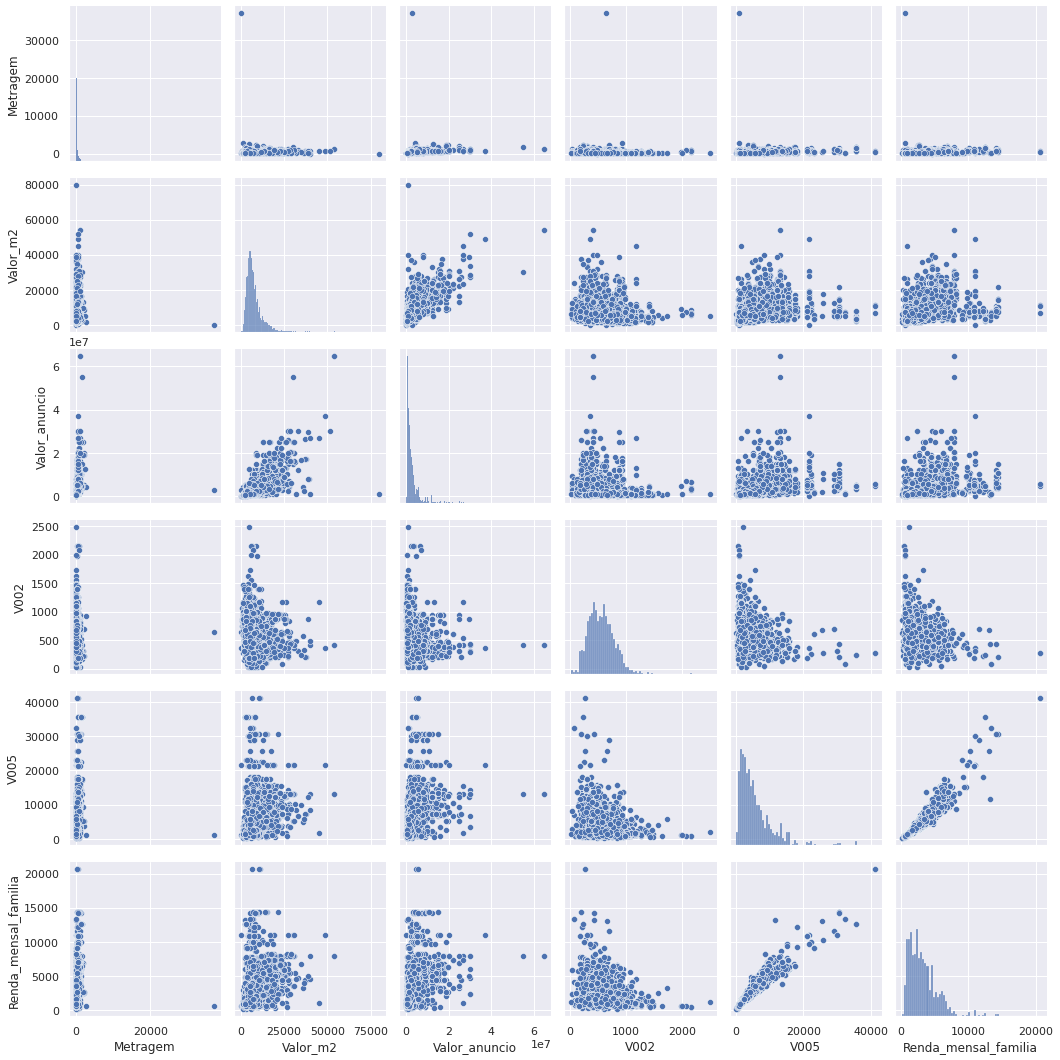

In [ ]:
sns.pairplot(dados_vendas_censo[['Metragem', 'Valor_m2', 'Valor_anuncio', 'V002', 'V005', 'Renda_mensal_familia']])

## [DESAFIO 4] Realizar a análise exploratória e encontrar variáveis relevantes para solução do problema.

<AxesSubplot:>

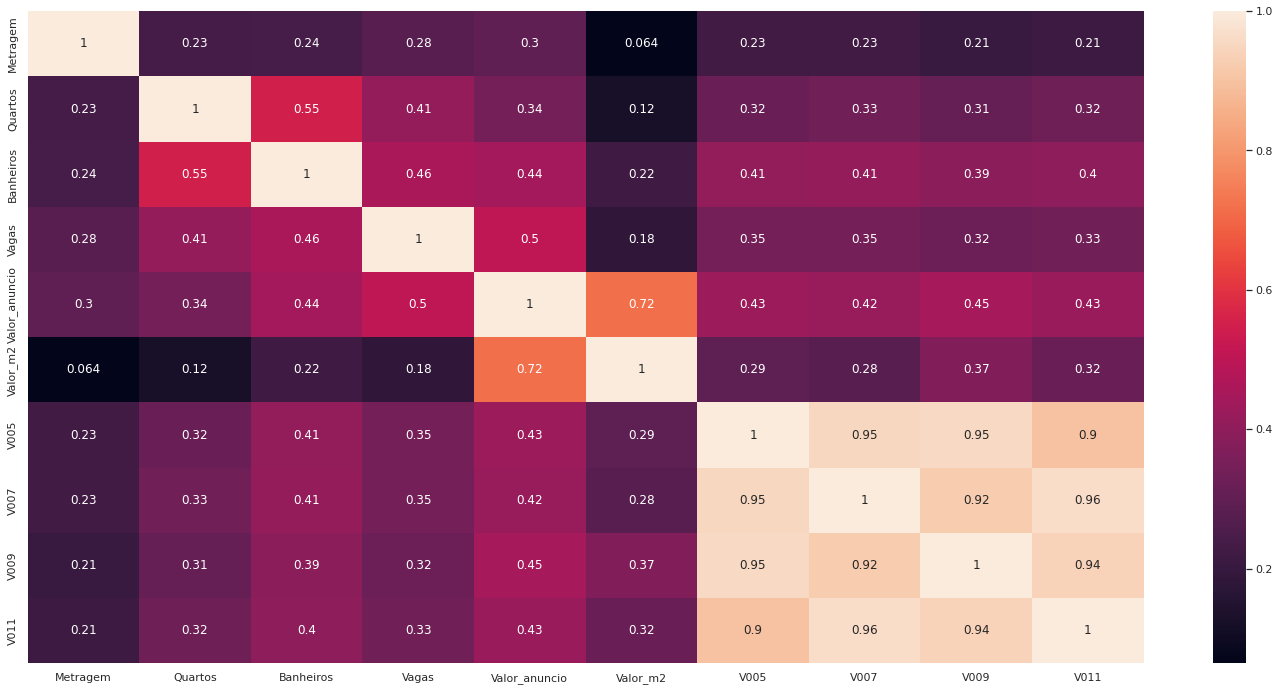

In [ ]:
corr = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio', 'Valor_m2', 'V005', 'V007', 'Renda_mensal_familia', 'V011']].corr()

sns.set(rc = {'figure.figsize':(25,12)})
sns.heatmap(corr, annot=True)